### Q1: Implement a full-enumeration tree to list all 6! schedules and their associated objective values.

In [ ]:
def permutations(iterable, r=None):
  pool = tuple(iterable)
  n = len(pool)
  r = n if r is None else r

  if r > n:
    return []

  indices = list(range(n))
  cycles = list(range(n, n-r, -1))

  result = []
  result.append(tuple(pool[i] for i in indices[:r]))

  while n:
    for i in reversed(range(r)):
      cycles[i] -= 1
      if cycles[i] == 0:
        indices[i:] = indices[i+1:] + indices[i:i+1]
        cycles[i] = n - i
      else:
        j = cycles[i]
        indices[i], indices[-j] = indices[-j], indices[i]
        result.append(tuple(pool[i] for i in indices[:r]))
        break
    else:
      return result


def total_time(schedule, process_times, arrive_times):
  complete_time = []
  initial_time = 0
  for i in schedule :
    if (arrive_times[i-1] > initial_time) :
      initial_time += arrive_times[i-1] + process_times[i-1]
    else :
      initial_time += process_times[i-1]
    complete_time.append(initial_time)
  # return complete_time
  return sum(complete_time)

def enumerate_schedules(processing_times, arrive_times):
  all_schedules = list(permutations(range(1, n+1)))
  results = []

  for schedule in all_schedules:
    objective_value = total_time(schedule, process_times, arrive_times)
    results.append((schedule, objective_value))

  return results

# main
n = 6
process_times = [6, 2, 5, 2, 8, 2]
arrive_times = [0, 2, 2, 6, 7, 9]

schedules = enumerate_schedules(process_times, arrive_times)

#for schedule, objective_value in schedules:
#  print(f'排程: {schedule}, 目標值: {objective_value}')

optimal_schedule, optimal_value = min(schedules, key = lambda x:x[1])

print('minimum s: ', end = "")
for schedule, objective_value in schedules:
  if objective_value == optimal_value:
    print(schedule, end = " ")
print(f', 對應目標值: {optimal_value}')

minimum s: (1, 2, 4, 6, 3, 5) (1, 4, 2, 6, 3, 5) , 對應目標值: 78


### Q2: Construct the schedule obtained from the Shortest Remaining Processing Time First (SRPT) rule. Deploy a min-heap to facilitate your implementation of the SRPT rule.

total complete time:  76
ensured that every task is finished： [[1, 0, 0], [2, 2, 0], [3, 2, 0], [4, 6, 0], [5, 7, 0], [6, 9, 0]]


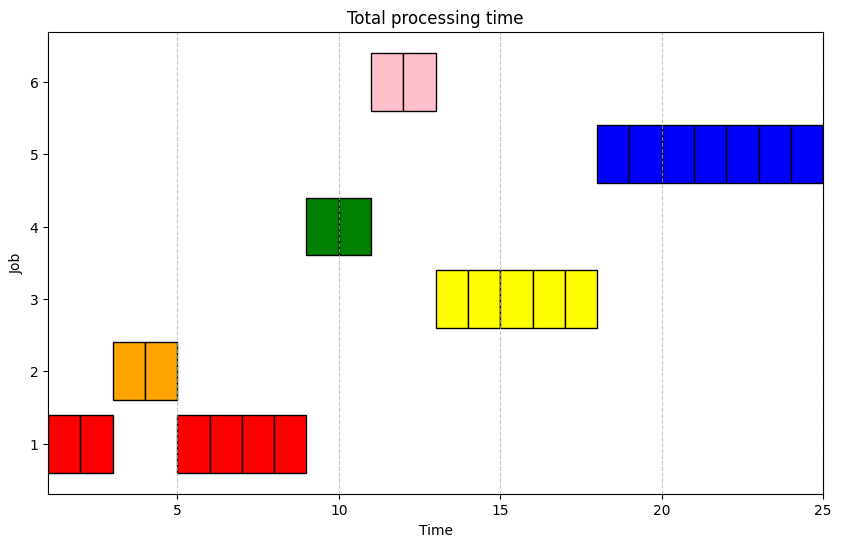

In [ ]:
import matplotlib.pyplot as plt

def Heapify(array,n):
  min = n
  leftChild = 2*n + 1
  rightChild = 2*n + 2
  if(leftChild < len(array) or rightChild < len(array)):
    if (leftChild < len(array) and int(array[leftChild][2]) < int(array[min][2])):
      min = leftChild
    if (rightChild < len(array) and int(array[rightChild][2]) < int(array[min][2])):
      min = rightChild
    if(min != n):
      index = array[n]
      array[n] = array[min]
      array[min] = index
      Heapify(array, min)

def delete(array):
  a = array[0]
  array[0] = array[len(array) - 1]
  array[len(array) - 1] = a
  array.pop(len(array) - 1)
  min_heap(array, len(array))

def insert(array, new_num):
  array.append(new_num)
  min_heap(array, len(array))

def min_heap(array,n):
  for i in range(int(n // 2), -1, -1):
    Heapify(array, i)

def totalTime(process):
  # min_heap(process,len(process))
  sumTime = 0
  ct = [0] * len(process)
  complete = 0
  t = 0
  while (complete != len(process)): #當所有任務還未完成
    for i in range(0, len(process)):
        if (process[i][1] <= t and process[i][2] > 0):
          if (i == 0):
            nowTask = [process[i]] #若第一個任務，則創立一個陣列並將第一個任務放入
          if(i != 0):
            insert(nowTask, process[i]) #插入新的任務並min-heap
    t = t+1
    if(len(nowTask) != 0): #若nowtask中有資料
      job.append(nowTask[0][0])
      # print("現在執行的job為：", nowTask[0][0]) #印出現在執行任務的index
      process[nowTask[0][0]-1][2] = process[nowTask[0][0]-1][2] - 1
      if(nowTask[0][2] <= 0): #若nowtask[0]的任務完成
        complete = complete + 1
        ct[nowTask[0][0]-1] = t
    nowTask = []
  print("total complete time: ", sum(ct))
  # print(job)

def plot_chart(x, y):
  plt.figure(figsize=(10, 6))
  colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink']

  for i in range(len(x)):
    if y[i] != 0:
      plt.barh(y[i], 1, left=x[i], color=colors[y[i] - 1], edgecolor='black')

  plt.xlabel('Time')
  plt.ylabel('Job')
  plt.title('Total processing time')
  plt.yticks(range(1, 7))
  plt.xlim(1, max(x))
  plt.grid(axis='x', linestyle='--', alpha=0.7)
  plt.show()

# main
# job, non-negative arrive time, positive processing length
process = [[1,0,6], [2,2,2], [3,2,5], [4,6,2], [5,7,8], [6,9,2]] #length is 6
job = []
totalTime(process)
print("ensured that every task is finished：", process) #process[][2]都需歸零

x = list(range(1, 26))
plot_chart(x, job)